# Text Classification and Sentiment Analysis

# 

In [1]:
import numpy as np # importing numpy library 
import pandas as pd # pandas library to load and create data frame and prepare data

In [2]:
import re
import string   
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [3]:
#loading of data
columns = ["Id","Entity","Target","Text"]
data = pd.read_csv("twitter_training.csv",
                   names=columns,header=None)

In [4]:
#first five records
data.head()

,Id,Entity,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
#will keep only relevant features that will be used by the classifier
df = data[["Text","Target"]]

In [7]:
df.head()

,Text,Target
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [9]:
#we can see that our data frame consist of 74682 records and 2 columns
df.shape

(74682, 2)

In [10]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    73996 non-null  object
 1   Target  74682 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [11]:
#Need to remove duplicates to ensure have better accuracy
df= df.drop_duplicates()

In [34]:
#check if null values found in the dataset,sum will return how many values is null
df.isnull().sum()

Text         4
Target       0
Sentiment    0
dtype: int64

In [35]:
#we remove the null value that we found
df = df.dropna()

<AxesSubplot:xlabel='Target', ylabel='count'>

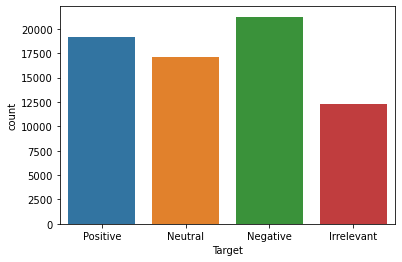

In [36]:
#checking the class, and we can notice that there is a class imbalance, data consists of more negative class
sns.countplot(x="Target",data=df)

In [37]:
#converting classes to numeric 
#we created an empty list and appended values to the list to represent a certain class
sentiment = []

for i in df["Target"]:
    if i == "Positive":
        sentiment.append(1)
    elif (i == "Irrelevant") or (i == "Neutral"):
        sentiment.append(0)
    else:
        sentiment.append(-1)
df["Sentiment"] = sentiment

In [38]:
df.head()

,Text,Target,Sentiment
0,im getting on borderlands and i will murder yo...,Positive,1
1,I am coming to the borders and I will kill you...,Positive,1
2,im getting on borderlands and i will kill you ...,Positive,1
3,im coming on borderlands and i will murder you...,Positive,1
4,im getting on borderlands and i will murder y...,Positive,1


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

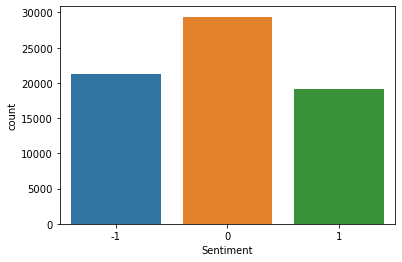

In [39]:
#checking the class, and we can notice that there is a class imbalance, data consists of more negative class
sns.countplot(x="Sentiment",data=df)

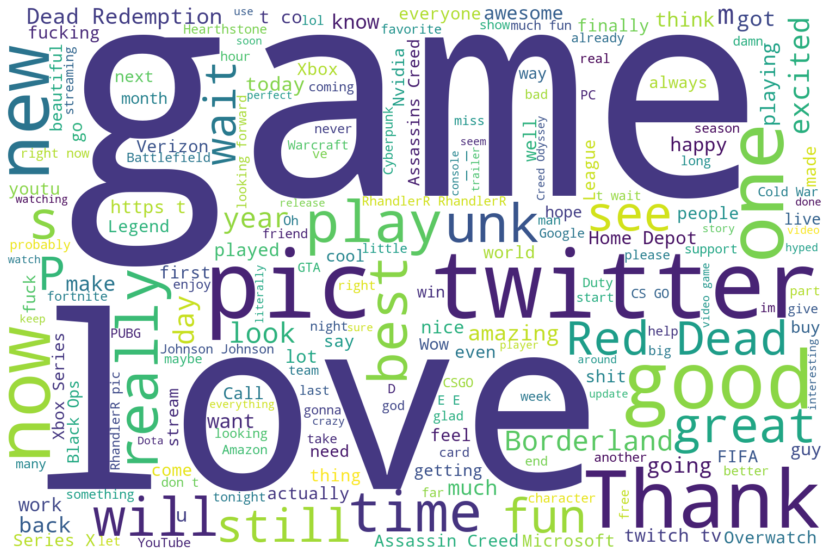

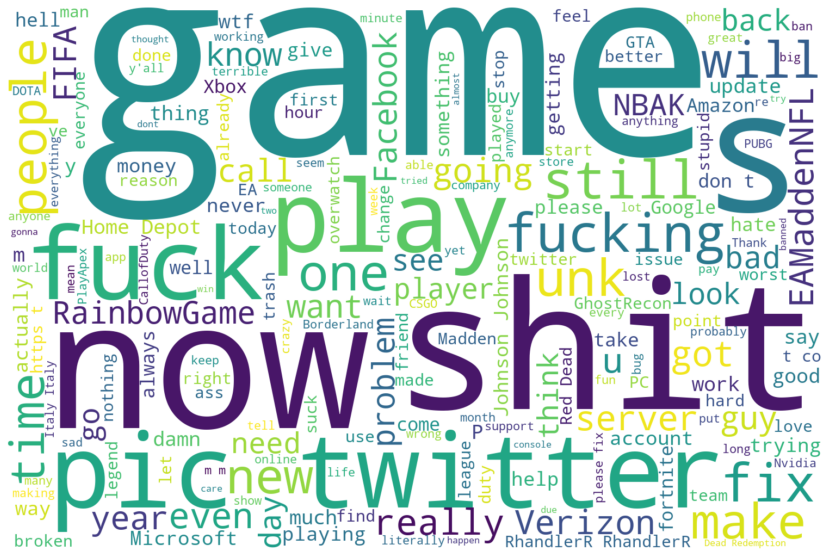

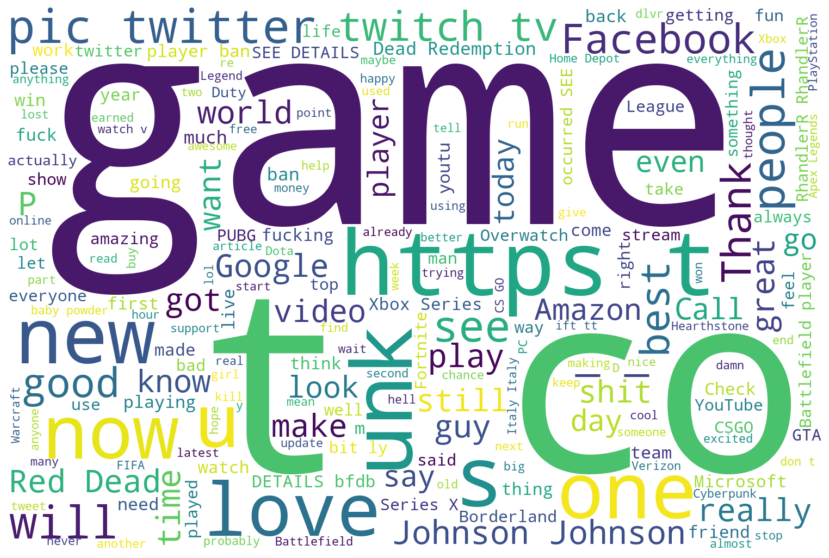

In [43]:
# Generating a word cloud of frequency of text
train_s0 = df[df.Sentiment ==1]
# Generating a word cloud of frequency of text
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1500, height=1000).generate(" ".join(train_s0['Text']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generating a word cloud of frequency of text
train_s0 = df[df.Sentiment ==-1]
# Generating a word cloud of frequency of text
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1500, height=1000).generate(" ".join(train_s0['Text']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Generating a word cloud of frequency of text
train_s0 = df[df.Sentiment ==0]
# Generating a word cloud of frequency of text
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1500, height=1000).generate(" ".join(train_s0['Text']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
#for text classification, we need to take of very common english words, that can occur several times in a sentence
#we are going to use stopwords for this
stop_words = set(stopwords.words("english"))

In [21]:
#list of stopwords, these 
print(stop_words)

{'up', 'both', 'should', 'her', 'between', 'how', 'doing', 'an', 'i', 've', 'o', 'wouldn', 'now', 'yours', 'being', "mightn't", "hasn't", 'no', 'won', 'from', 'll', 'into', 'during', 'nor', 'haven', 're', 'needn', 'down', 'didn', 'off', 'd', "mustn't", 'does', 'couldn', 'been', 'only', 'above', 'ourselves', 'all', "you're", 'below', 'when', 'or', 'had', 'then', "shouldn't", 'same', 'is', 'against', 'of', "it's", 'some', 'so', 'mightn', 'weren', "you'd", "doesn't", 'if', 't', 'to', 'who', 'she', 'wasn', 'have', 'in', 'under', 'were', "haven't", 'too', 'himself', 'm', 'having', "aren't", 'yourself', 'mustn', 'this', 'with', 'herself', 'will', 'what', 'each', 'than', 'y', 'am', 'these', 'own', 'your', "that'll", 'it', 'him', 'was', 'out', 'ours', 'because', 'on', 'before', 'and', 'such', 'ain', 'hadn', 'as', 'those', 'their', 'further', 'which', 'yourselves', 'can', 'don', 'that', "wasn't", 'are', "you've", 'its', 'why', 'they', 'through', 'them', 'very', "wouldn't", 'most', 'my', "didn't

In [17]:
#this code will replace all digits found in text with nothin for example borderland 2 --> borderland
df["Text"] = df["Text"].str.replace("\d","")

In [18]:
df.head()

,Text,Target,Sentiment
0,im getting on borderlands and i will murder yo...,Positive,1
1,I am coming to the borders and I will kill you...,Positive,1
2,im getting on borderlands and i will kill you ...,Positive,1
3,im coming on borderlands and i will murder you...,Positive,1
4,im getting on borderlands and i will murder y...,Positive,1


In [44]:
tokens = word_tokenize(str(df["Text"]).replace("'", "").lower()) 

In [48]:
tokens[2]

'getting'

In [ ]:
#to tackle punctuations we can use regular expressions, translation or simply use isalpha() function bearing in mind that space 
#is eliminated with this function we will tokenize the text first, to note that if there is a massive dataset translate is the most efficient function
#https://towardsdatascience.com/how-to-efficiently-remove-punctuations-from-a-string-899ad4a059fb
